# Proyek Analisis Data: [Bike-sharing Dataset]
- **Nama:** Meicha Salsabila Budiyanti
- **Email:** meichabudianti@gmail.com
- **ID Dicoding:** MC229D5X1101

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda pada hari kerja dibandingkan akhir pekan?
- Seberapa besar pengaruh cuaca terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [454]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [455]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Peminjaman oleh pengguna terdaftar (registered) lebih tinggi dibandingkan pengguna casual, hari kerja mungkin memiliki jumlah peminjaman lebih banyak dibandingkan hari libur, faktor cuaca seperti suhu, kelembaban, dan kecepatan angin mungkin memengaruhi jumlah peminjaman.
- Peminjaman sepeda mungkin lebih tinggi pada jam berangkat kerja (pagi) dan pulang kerja (sore/malam), hari libur dan kerja kemungkinan memiliki pola peminjaman yang berbeda.

### Assessing Data

In [456]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Jumlah data pada day_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday yang harusnya direpresentasikan sebagai datetime bukan object.
- Jumlah data pada hour_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom dteday yang harusnya direpresentasikan sebagai datetime bukan object.

In [457]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

day_df.describe() #Mengetahui apakah ada data yang terduplikat

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [458]:
#Melihat missing value
missing_values = day_df.isnull().sum()
print(missing_values)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


### Cleaning Data

In [459]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [460]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Memperbaiki kesalahan dteday yang bertipe object diganti menjadi tipe datetime dengan menggunakan function to_datetime() dari library pandas. Kemudian memastikan kembali apakah sudah diperbaiki dengan memanggil kembali day_df.info()
- Memperbaiki kesalahan dteday yang bertipe object diganti menjadi tipe datetime dengan menggunakan function to_datetime() dari library pandas. Kemudian memastikan kembali apakah sudah diperbaiki dengan memanggil kembali hour_df.info()

## Exploratory Data Analysis (EDA)

### Explore ...

In [461]:
print(day_df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [462]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [463]:
weathersit_day = day_df.groupby(by='weathersit').agg({
    "cnt": "mean",
    "registered": "mean",
    "casual": "mean"
})
display(weathersit_day)

,cnt,registered,casual
weathersit,,,
1,4876.786177,3912.755940,964.030238
2,4035.862348,3348.510121,687.352227
3,1803.285714,1617.809524,185.476190


In [464]:
working_day = day_df.groupby(by='workingday').agg({
    "cnt": "mean",
    "registered": "mean",
    "casual": "mean"
})
display(working_day)

,cnt,registered,casual
workingday,,,
0,4330.168831,2959.034632,1371.134199
1,4584.820000,3978.250000,606.570000


In [465]:
mapping_hari = {
    0: "Monday", 1: "Tuesday", 2: "Wednesday",
    3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"
}

day_df["weekday"] = day_df["weekday"].map(mapping_hari)

weekday_usage = day_df.groupby("weekday")["cnt"].sum().sort_values(ascending=False).reset_index()
print(weekday_usage)

     weekday     cnt
0   Saturday  487790
1     Friday  485395
2     Sunday  477807
3   Thursday  473048
4  Wednesday  469109
5    Tuesday  455503
6     Monday  444027


In [466]:
weather_mapping = {1:"Cerah", 2:"Berawan", 3:"Hujan Ringan", 4:"Hujan Lebat"}
day_df["weather_category"] = day_df["weathersit"].map(weather_mapping)

day_melted = day_df.groupby(by='weather_category').agg({
    "cnt": "sum",
    "registered": "sum",
    "casual": "sum"
}).reindex(["Cerah", "Berawan", "Hujan Ringan", "Hujan Lebat"]).fillna(0)
display(day_melted)

,cnt,registered,casual
weather_category,,,
Cerah,2257952.0,1811606.0,446346.0
Berawan,996858.0,827082.0,169776.0
Hujan Ringan,37869.0,33974.0,3895.0
Hujan Lebat,0.0,0.0,0.0


**Insight:**
- Pada data day_df memuat informasi bahwa :

  1. Kolom workingday bernilai 1 untuk hari kerja dan 0 untuk akhir pekan/libur.
  2. Rata-rata workingday sebesar 0.68 menunjukkan bahwa sebagian besar data merupakan hari kerja.
  3. Rata-rata jumlah penyewaan sepeda per hari adalah 4504, minimum jumlah penyewaan hanya 22 sepeda sedangkan maksimum mencapai 8714 sepeda.
  4. Nilai rata-rata 1.39 menunjukkan bahwa mayoritas hari memiliki kondisi cuaca baik atau cerah.



## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan hari dalam seminggu, dan apakah terdapat perbedaan signifikan antara hari kerja dan akhir pekan dalam jumlah penyewaan?

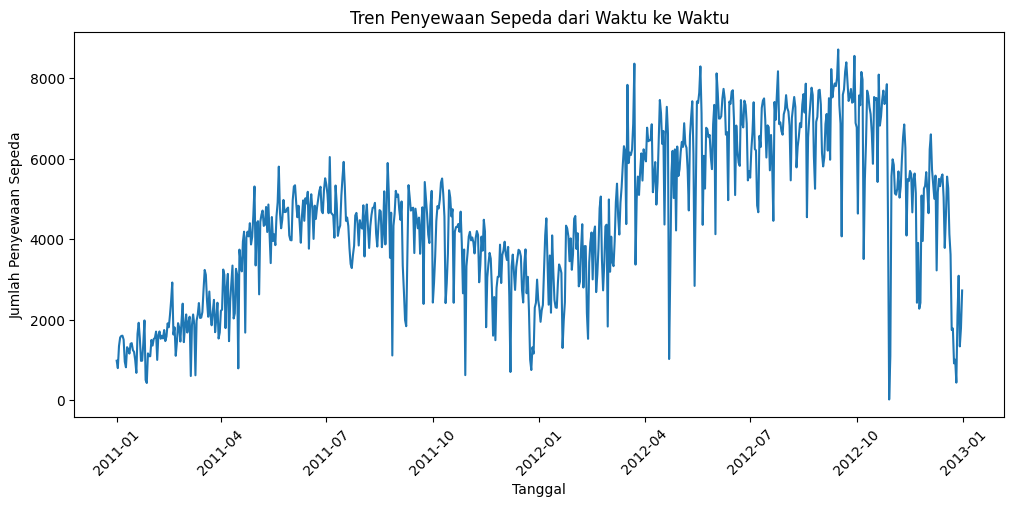

In [467]:
#Melihat total penyewaan sepeda dari waktu ke waktu dulu
plt.figure(figsize=(12, 5))
sns.lineplot(x=day_df["dteday"], y=day_df["cnt"])
plt.xticks(rotation=45)
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Tren Penyewaan Sepeda dari Waktu ke Waktu")
plt.show()

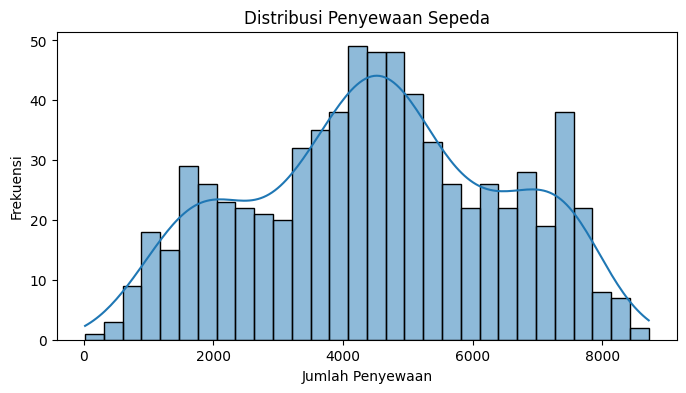

In [468]:
# Distribusi Penyewaan Sepeda
plt.figure(figsize=(8, 4))
sns.histplot(day_df["cnt"], bins=30, kde=True)
plt.title("Distribusi Penyewaan Sepeda")
plt.xlabel("Jumlah Penyewaan")
plt.ylabel("Frekuensi")
plt.show()

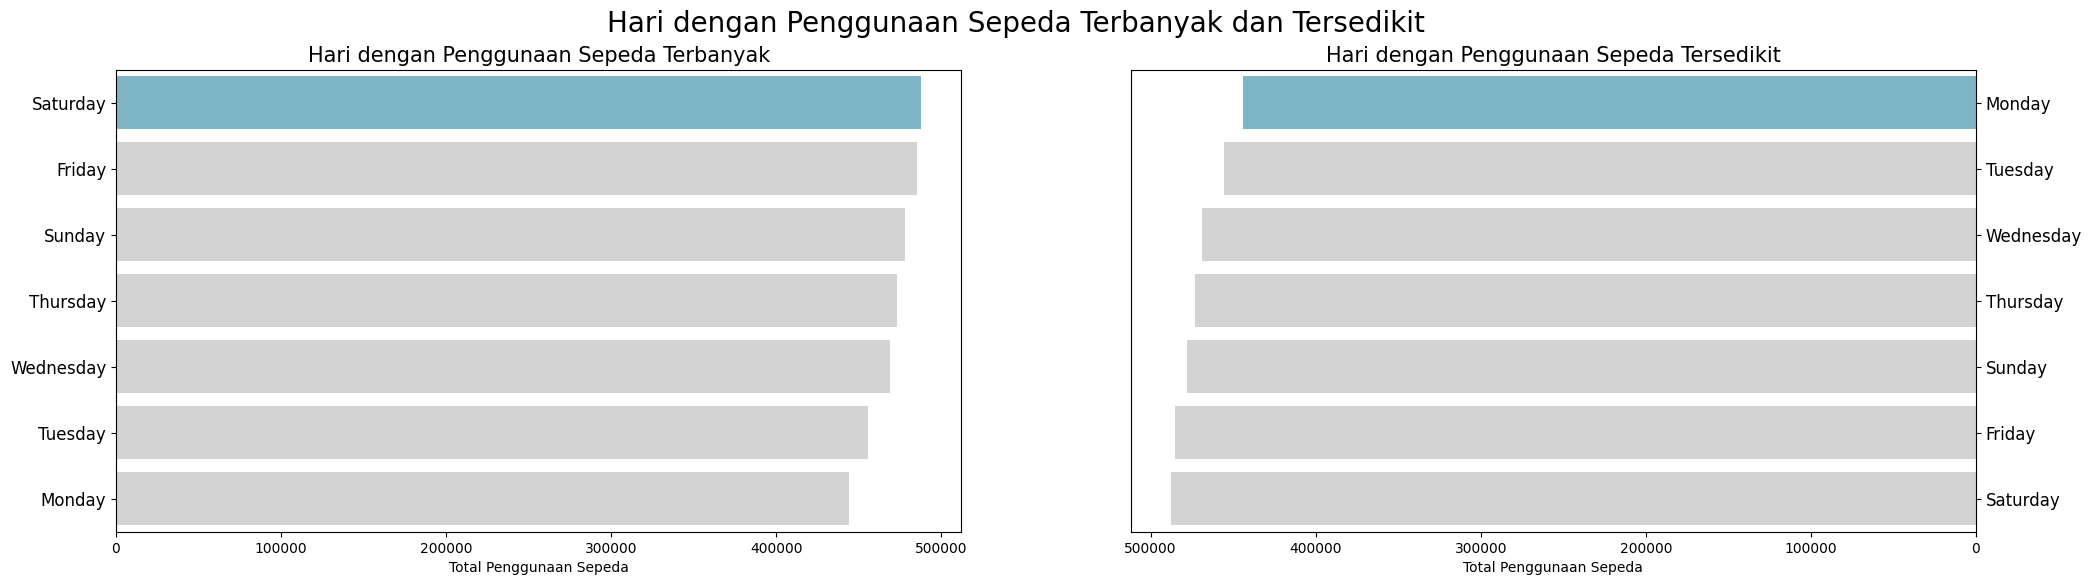

In [469]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3","#D3D3D3"]

# hari dengan penggunaan sepeda terbanyak
sns.barplot(x="cnt", y="weekday", data=weekday_usage.head(7), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Total Penggunaan Sepeda")
ax[0].set_title("Hari dengan Penggunaan Sepeda Terbanyak", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

# hari dengan penggunaan sepeda tersedikit
sns.barplot(x="cnt", y="weekday", data=weekday_usage.sort_values(by="cnt", ascending=True).head(7), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Total Penggunaan Sepeda")
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Hari dengan Penggunaan Sepeda Tersedikit", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Hari dengan Penggunaan Sepeda Terbanyak dan Tersedikit", fontsize=20)
plt.show()

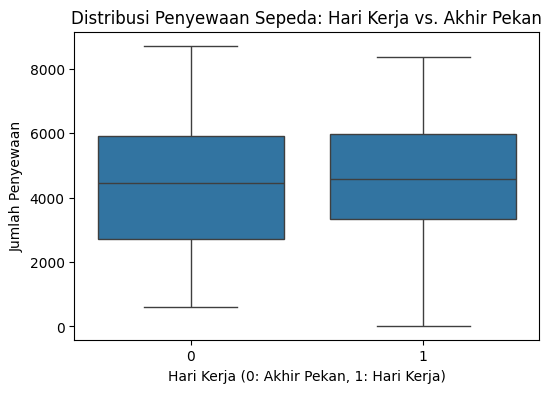

In [470]:
# Boxplot untuk melihat distribusi penyewaan berdasarkan hari kerja
plt.figure(figsize=(6, 4))
sns.boxplot(x="workingday", y="cnt", data=day_df)
plt.title("Distribusi Penyewaan Sepeda: Hari Kerja vs. Akhir Pekan")
plt.xlabel("Hari Kerja (0: Akhir Pekan, 1: Hari Kerja)")
plt.ylabel("Jumlah Penyewaan")
plt.show()

**Insight:**

- Hari dengan Penggunaan Sepeda Terbanyak dan Tersedikit

  1. Sabtu memiliki jumlah penggunaan sepeda terbanyak, sementara Senin memiliki jumlah penggunaan sepeda tersedikit.

- Cluster Penggunaan Sepeda Berdasarkan Hari

  1. Hari Sabtu masuk dalam kategori "Tinggi" (warna merah), yang berarti penggunaan sepeda sangat banyak.
  2. Hari Senin masuk dalam kategori "Rendah" (warna hijau), yang menguatkan temuan sebelumnya bahwa Senin adalah hari dengan penggunaan sepeda paling sedikit.
  3. Hari Selasa, Rabu, Kamis, Jumat berada dalam kategori "Sedang" (warna kuning), menunjukkan pola penggunaan sepeda yang lebih stabil.

#### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda, baik untuk pengguna terdaftar (registered) maupun pengguna kasual (casual)?

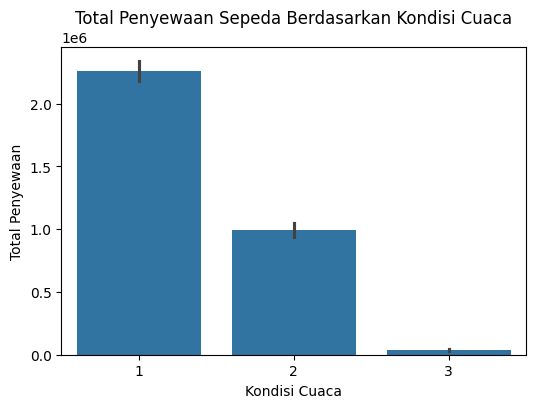

In [471]:
# Barplot untuk melihat pengaruh cuaca terhadap penyewaan
plt.figure(figsize=(6, 4))
sns.barplot(x="weathersit", y="cnt", data=day_df, estimator=sum)
plt.title("Total Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Total Penyewaan")
plt.show()

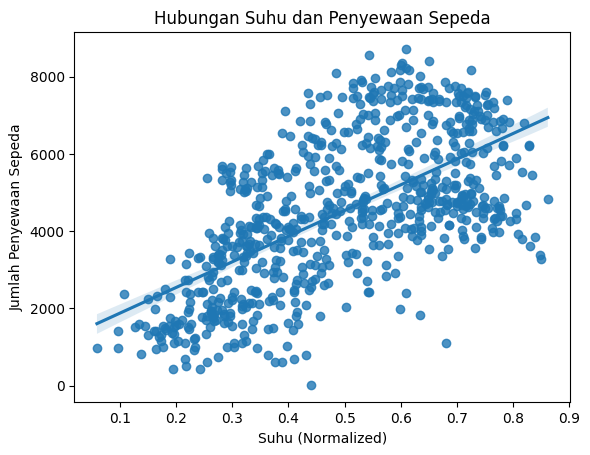

In [472]:
sns.regplot(x=day_df['temp'], y=day_df['cnt'])
plt.xlabel("Suhu (Normalized)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Hubungan Suhu dan Penyewaan Sepeda")
plt.show()

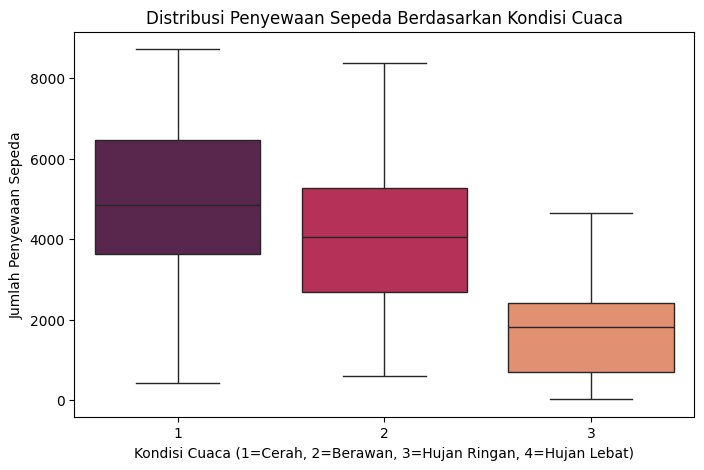

In [473]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=day_df['weathersit'], y=day_df['cnt'],palette="rocket")
plt.xlabel("Kondisi Cuaca (1=Cerah, 2=Berawan, 3=Hujan Ringan, 4=Hujan Lebat)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.show()

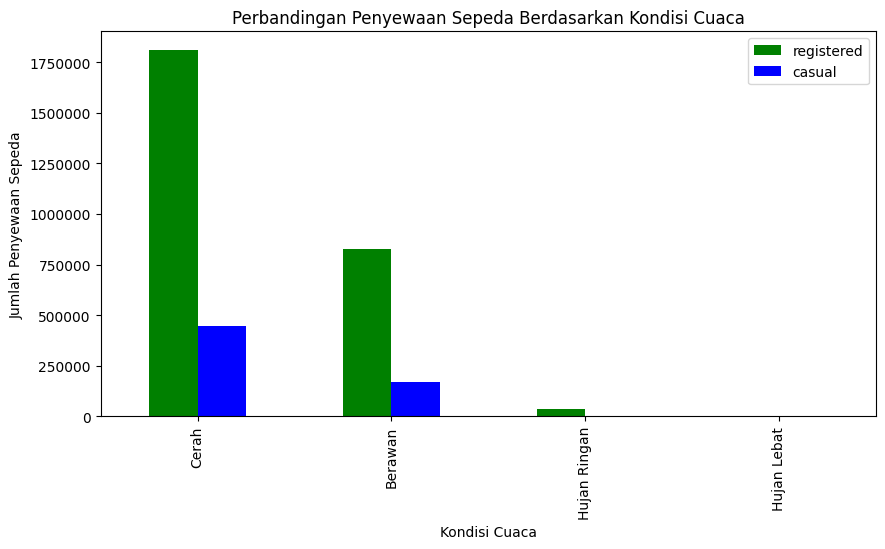

In [474]:
#Membuat baar plot untuk weathercategory dengan cnt, registered, dan casual ada dalam satu plot
ax=day_melted[['registered', 'casual']].plot(kind='bar', figsize=(10, 5),color=['green','blue'])
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Perbandingan Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.legend()
ax.ticklabel_format(style='plain', axis='y')
plt.show()


**Insight:**
- Tren Penyewaan Sepeda dari Waktu ke Waktu

  1. Terlihat pola musiman dalam jumlah penyewaan sepeda, di mana terdapat kenaikan dan penurunan dalam periode tertentu.
  2. Terdapat peningkatan tren penyewaan dari tahun 2011 ke 2012, kemudian terjadi kenaikan yang cukup besar.
- Hubungan Suhu dan Penyewaan Sepeda

  1. Plot sebar menunjukkan adanya hubungan positif antara suhu yang telah dinormalisasi dan jumlah penyewaan sepeda.
  2. Ketika suhu meningkat, jumlah penyewaan sepeda juga cenderung meningkat
  3. Garis regresi linier menunjukkan korelasi positif, meskipun ada penyebaran data yang cukup luas.
- Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca

  1. Penyewaan sepeda cenderung lebih tinggi saat cuaca cerah dibandingkan dengan kondisi cuaca lain.
  2. Saat cuaca berawan, jumlah penyewaan sedikit lebih rendah dibandingkan saat cerah, tetapi masih relatif tinggi.
  3. Penyewaan sepeda menurun secara signifikan ketika terjadi hujan ringan.
  4. Penyewaan sepeda hampir tidak ada atau sangat sedikit ketika hujan lebat.
- Perbedaan Pengaruh Cuaca terhadap Pengguna Terdaftar dan Kasual

  1. Pengguna registered memiliki jumlah penyewaan yang jauh lebih tinggi dibandingkan dengan pengguna casual dalam semua kondisi cuaca.
  2. Pada cuaca cerah dan berawan, pengguna registered tetap aktif menyewa sepeda dalam jumlah besar.
  3. Saat hujan ringan, jumlah penyewaan menurun secara signifikan untuk kedua jenis pengguna, tetapi lebih drastis pada pengguna casual dibandingkan pengguna registered.

## Analisis Lanjutan (Opsional)

In [475]:
# Hitung mean dan standar deviasi untuk clustering
mean_usage = weekday_usage["cnt"].mean()
std_usage = weekday_usage["cnt"].std()
def categorize_usage(cnt):
    if cnt >= mean_usage + std_usage:
        return "Tinggi"
    elif cnt <= mean_usage - std_usage:
        return "Rendah"
    else:
        return "Sedang"
weekday_usage["cluster"] = weekday_usage["cnt"].apply(categorize_usage)
print(weekday_usage)

     weekday     cnt cluster
0   Saturday  487790  Tinggi
1     Friday  485395  Sedang
2     Sunday  477807  Sedang
3   Thursday  473048  Sedang
4  Wednesday  469109  Sedang
5    Tuesday  455503  Sedang
6     Monday  444027  Rendah


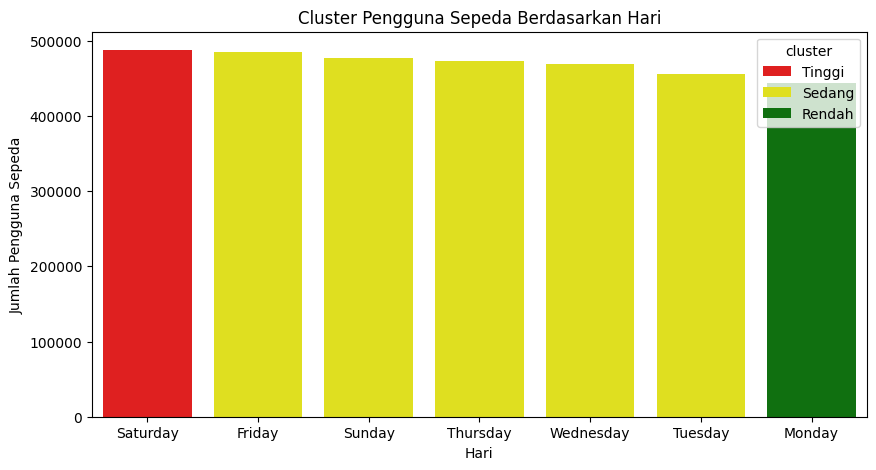

In [476]:
#Melihat grafik cluster penggunaan sepeda tiap hari
plt.figure(figsize=(10, 5))
sns.barplot(x="weekday", y="cnt", hue="cluster", data=weekday_usage, palette={"Tinggi":"red","Rendah":"green","Sedang":"yellow"})
plt.title("Cluster Pengguna Sepeda Berdasarkan Hari")
plt.xlabel("Hari")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.show()

## Conclusion

- Pola penggunaan sepeda menunjukkan perbedaan signifikan antara hari kerja dan akhir pekan. Pada hari kerja, sepeda digunakan sebagai alat transportasi dengan puncak penggunaan di pagi dan sore hari, sementara pada akhir pekan penggunaannya lebih merata untuk aktivitas rekreasi. Sabtu adalah hari dengan penggunaan tertinggi, sedangkan Senin memiliki penggunaan terendah.
- Cuaca memiliki dampak besar terhadap jumlah penyewaan sepeda. Penyewaan sepeda paling tinggi terjadi saat cuaca cerah dan menurun secara bertahap saat cuaca memburuk. Hujan ringan sudah cukup menyebabkan penurunan signifikan, terutama bagi pengguna casual. Sementara itu, pengguna registered cenderung tetap menyewa sepeda dalam jumlah besar meskipun kondisi cuaca tidak ideal.

In [477]:
day_df.to_csv("all_data.csv", index=False)

In [478]:
display(day_df.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weather_category
0,1,2011-01-01,1,0,1,0,Sunday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Berawan
1,2,2011-01-02,1,0,1,0,Monday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Berawan
2,3,2011-01-03,1,0,1,0,Tuesday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Cerah
3,4,2011-01-04,1,0,1,0,Wednesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Cerah
4,5,2011-01-05,1,0,1,0,Thursday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Cerah
